# Approximating a sine Function

## Import

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
np.random.seed(0)

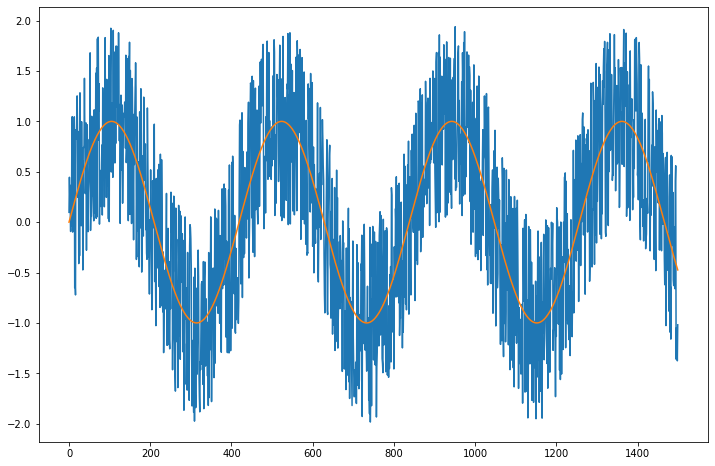

In [20]:
plt.figure(figsize=(12,8))
t = np.arange(0,1500)
x = np.sin(0.015*t) + np.random.uniform(low=-1, high=1, size=(1500,))
x_actual = np.sin(0.015*t)
plt.plot(x)
plt.plot(x_actual)
plt.show()

## Normalize

In [21]:
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)

[[0.53046776]
 [0.61911792]
 [0.56562058]
 ...
 [0.19383459]
 [0.1547965 ]
 [0.24593019]]


## Create Dataset

In [22]:
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [23]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
     
step = 10
trainX,trainY = createDataset(train,step)
testX,testY = createDataset(test,step)

print(trainX[0])

[[0.53046776]
 [0.61911792]
 [0.56562058]
 [0.5399316 ]
 [0.48194208]
 [0.59906553]
 [0.49667143]
 [0.73204294]
 [0.77249547]
 [0.48046345]]


In [25]:
print(trainY[0])

[0.69241117]


In [26]:
print(trainX.shape)

(990, 10, 1)


## Model Creation

In [27]:
model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
history = model.fit(trainX,trainY, epochs=500, batch_size=16, verbose=2)

Train on 990 samples
Epoch 1/500
990/990 - 0s - loss: 0.0997
Epoch 2/500
990/990 - 0s - loss: 0.0640
Epoch 3/500
990/990 - 0s - loss: 0.0516
Epoch 4/500
990/990 - 0s - loss: 0.0483
Epoch 5/500
990/990 - 0s - loss: 0.0456
Epoch 6/500
990/990 - 0s - loss: 0.0422
Epoch 7/500
990/990 - 0s - loss: 0.0384
Epoch 8/500
990/990 - 0s - loss: 0.0355
Epoch 9/500
990/990 - 0s - loss: 0.0334
Epoch 10/500
990/990 - 0s - loss: 0.0322
Epoch 11/500
990/990 - 0s - loss: 0.0316
Epoch 12/500
990/990 - 0s - loss: 0.0310
Epoch 13/500
990/990 - 0s - loss: 0.0307
Epoch 14/500
990/990 - 0s - loss: 0.0304
Epoch 15/500
990/990 - 0s - loss: 0.0302
Epoch 16/500
990/990 - 0s - loss: 0.0299
Epoch 17/500
990/990 - 0s - loss: 0.0298
Epoch 18/500
990/990 - 0s - loss: 0.0296
Epoch 19/500
990/990 - 0s - loss: 0.0294
Epoch 20/500
990/990 - 0s - loss: 0.0293
Epoch 21/500
990/990 - 0s - loss: 0.0292
Epoch 22/500
990/990 - 0s - loss: 0.0291
Epoch 23/500
990/990 - 0s - loss: 0.0289
Epoch 24/500
990/990 - 0s - loss: 0.0288
Epoc

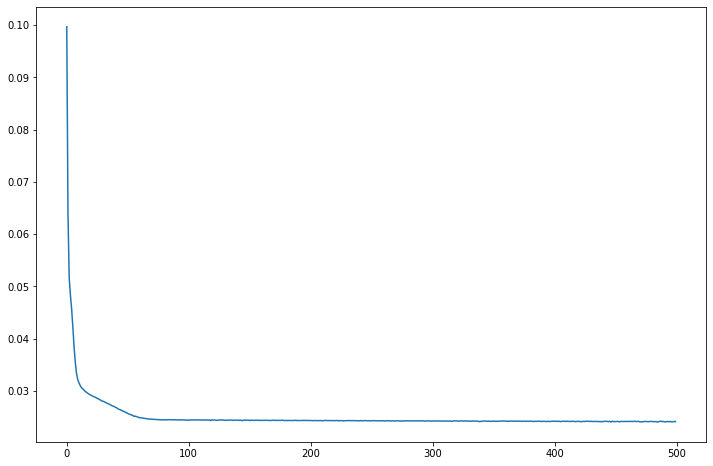

In [28]:
plt.figure(figsize=(12,8))
loss = history.history['loss']
plt.plot(loss)
plt.show()

## Prediction

In [0]:
trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict= normalizer.inverse_transform(model.predict(testX))
predicted= np.concatenate((trainPredict,testPredict))
x = normalizer.inverse_transform(x)

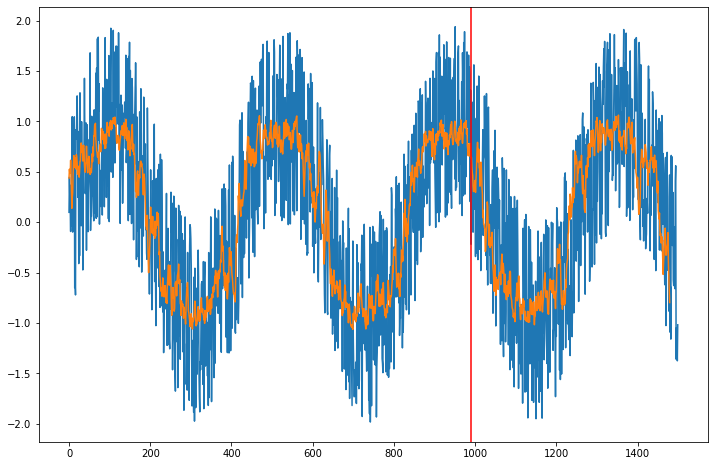

In [30]:
plt.figure(figsize=(12,8))
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()